In [1]:
# Importing Important Libaries:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset :
df = pd.read_csv("C:/Users/Dhatch/Downloads/youtube_ad_revenue_dataset.csv")
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [3]:
# Getting an idea about column names :
df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [4]:
"""
we can see here all the column names are in lowercase we should change title format
"""

'\nwe can see here all the column names are in lowercase we should change title format\n'

In [5]:
# All the column names in lowercase format so,we need to change capitalize format:

df.columns = df.columns.str.title()
df.columns

Index(['Video_Id', 'Date', 'Views', 'Likes', 'Comments', 'Watch_Time_Minutes',
       'Video_Length_Minutes', 'Subscribers', 'Category', 'Device', 'Country',
       'Ad_Revenue_Usd'],
      dtype='object')

In [6]:
# Getting an idea about datatypes and non null count of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Video_Id              122400 non-null  object 
 1   Date                  122400 non-null  object 
 2   Views                 122400 non-null  int64  
 3   Likes                 116283 non-null  float64
 4   Comments              116288 non-null  float64
 5   Watch_Time_Minutes    116295 non-null  float64
 6   Video_Length_Minutes  122400 non-null  float64
 7   Subscribers           122400 non-null  int64  
 8   Category              122400 non-null  object 
 9   Device                122400 non-null  object 
 10  Country               122400 non-null  object 
 11  Ad_Revenue_Usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [7]:
# some columns are not in correct datatype ,so that we need to change datatypes for those columns:

df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Extarcting Year, Month

df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 

df.head()

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,2024,9
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,2024,9
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,2024,11
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,2025,1
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,2025,4


In [8]:
# Here chanaged columns names 'str' into 'object' 

df = df.astype({'Video_Id' : object, 'Category' : object, 'Device' : object, 'Country' : object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Video_Id              122400 non-null  object        
 1   Date                  122400 non-null  datetime64[ns]
 2   Views                 122400 non-null  int64         
 3   Likes                 116283 non-null  float64       
 4   Comments              116288 non-null  float64       
 5   Watch_Time_Minutes    116295 non-null  float64       
 6   Video_Length_Minutes  122400 non-null  float64       
 7   Subscribers           122400 non-null  int64         
 8   Category              122400 non-null  object        
 9   Device                122400 non-null  object        
 10  Country               122400 non-null  object        
 11  Ad_Revenue_Usd        122400 non-null  float64       
 12  Year                  122400 non-null  int32         
 13 

In [9]:
# Getting an idea about null values:
df.isnull().sum().any()

np.True_

In [10]:
''' 
if np.True menas there are some null values. we should treat the null values 
'''

' \nif np.True menas there are some null values. we should treat the null values \n'

In [11]:
# Getting an idea about column wise null values :

df.isnull().sum()

Video_Id                   0
Date                       0
Views                      0
Likes                   6117
Comments                6112
Watch_Time_Minutes      6105
Video_Length_Minutes       0
Subscribers                0
Category                   0
Device                     0
Country                    0
Ad_Revenue_Usd             0
Year                       0
Month                      0
dtype: int64

In [12]:
''' 
we can see above code says there are three columns has null values 

(1) we drop the rows with NULL values, when the total number rows 
with missing data is 5% , so that we can handle the null values 

likes,comments,Watch_Time_Minutes all the columns are floating data type. so that we can use mean or median for imputing 
we can use meadian for imputing the null values why because median less affect the outliers than mean      

'''

' \nwe can see above code says there are three columns has null values \n\n(1) we drop the rows with NULL values, when the total number rows \nwith missing data is 5% , so that we can handle the null values \n\nlikes,comments,Watch_Time_Minutes all the columns are floating data type. so that we can use mean or median for imputing \nwe can use meadian for imputing the null values why because median less affect the outliers than mean      \n\n'

In [13]:
# imputing the null vallues :
df['Likes'] = df['Likes'].fillna(df['Likes'].median())
df['Comments'] = df['Comments'].fillna(df['Comments'].median())
df['Watch_Time_Minutes'] = df['Watch_Time_Minutes'].fillna(df['Watch_Time_Minutes'].median())

In [14]:
'''
after deleteing the null values rows we have sufficient amount amount of data for analysis

'''

'\nafter deleteing the null values rows we have sufficient amount amount of data for analysis\n\n'

In [15]:
df.isnull().sum().any()

np.False_

In [16]:
'''
here above code output says np.false , it means there is no outliers 

'''

'\nhere above code output says np.false , it means there is no outliers \n\n'

In [17]:
# Getting an idea about duplicate rows :

df.duplicated().sum().any()

np.True_

In [18]:
'''
as we can see there are some duplicate rows in the data. so, we should treat that duplicate rows 

'''

'\nas we can see there are some duplicate rows in the data. so, we should treat that duplicate rows \n\n'

In [19]:
df.duplicated().sum()

np.int64(2400)

In [ ]:
df[df.duplicated()] #getting duplicated rows

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month
3179,vid_4608,2025-01-11 10:50:40.993199,9945,1458.0,121.0,31645.774111,15.206639,224801,Tech,Desktop,CA,228.151319,2025,1
3231,vid_3134,2025-06-05 10:50:40.993199,10077,701.0,202.0,40120.596261,12.656050,580825,Tech,TV,UK,257.175292,2025,6
3666,vid_25,2024-09-18 10:50:40.993199,9947,1802.0,347.0,55506.461433,5.456635,385325,Tech,Tablet,DE,350.450592,2024,9
4710,vid_4926,2024-10-24 10:50:40.993199,9995,1286.0,292.0,34484.070853,4.757113,606881,Education,TV,DE,241.775903,2024,10
4818,vid_4966,2025-02-10 10:50:40.993199,10034,776.0,447.0,34912.309423,2.488627,46916,Entertainment,Mobile,DE,237.896544,2025,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122163,vid_4644,2024-08-25 10:50:40.993199,10047,1948.0,307.0,16349.810313,10.084170,176249,Gaming,Mobile,IN,168.188062,2024,8
122237,vid_2558,2024-07-27 10:50:40.993199,10028,1273.0,149.0,46832.765101,19.829163,733749,Tech,Tablet,DE,297.484978,2024,7
122263,vid_4264,2024-09-30 10:50:40.993199,10035,563.0,457.0,37531.990337,10.365727,892745,Gaming,TV,AU,162.047770,2024,9
122269,vid_2012,2025-06-07 10:50:40.993199,9919,688.0,152.0,58706.831545,18.868730,816381,Lifestyle,Mobile,IN,342.894716,2025,6


In [243]:
df.shape

(122400, 14)

In [244]:
# Remove the duplicate rows :
df.drop_duplicates(inplace=True)
df.shape

(120000, 14)

In [245]:
df.duplicated().sum()

np.int64(0)

In [246]:
'''
np.int64(0) means there is no duplicates 

'''

'\nnp.int64(0) means there is no duplicates \n\n'

In [247]:
# remove 'vid_' string value from the video_id column 

def remove(values):
    if 'vid_' in str(values):
        values = (int(values[4:]))
        return values 
    else:
        return values

In [248]:
# Making DataFrame clean format:
df['Video_Id'] = df['Video_Id'].apply(remove)
df.head()

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month
0,3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,2024,9
1,3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,2024,9
2,4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,2024,11
3,4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,2025,1
4,3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,2025,4


In [249]:
# getting an idea about catagorical column unique values :
catagorical_columns = df.select_dtypes(include=['category', 'object']).columns.tolist() 
catagorical_columns

['Category', 'Device', 'Country']

In [250]:
df['Video_Id'].unique()

array([3092, 3459, 4784, ..., 4757, 3953, 2224], shape=(5000,))

In [251]:
'There are 5000 unique videoid available '

'There are 5000 unique videoid available '

In [252]:
df['Category'].unique()

array(['Entertainment', 'Gaming', 'Education', 'Music', 'Tech',
       'Lifestyle'], dtype=object)

In [253]:
'There are four types of category available in the data  '

'There are four types of category available in the data  '

In [254]:
df['Device'].unique()

array(['TV', 'Tablet', 'Mobile', 'Desktop'], dtype=object)

In [255]:
''' 
There are four types of devices available  
'''

' \nThere are four types of devices available  \n'

In [256]:
df['Country'].unique()

array(['IN', 'CA', 'UK', 'US', 'DE', 'AU'], dtype=object)

In [257]:
'''
There are six Country are available  
'''

'\nThere are six Country are available  \n'

In [258]:
# change the country names short form to full name. 
df['Country'] = df['Country'].replace({'IN' : 'India', 'CA' : 'Canada', 'UK' : 'United Kingtom', 'AU' : 'Australia', 'DE' : 'Germany', 'US' : 'United States'})
df['Country'].unique()

array(['India', 'Canada', 'United Kingtom', 'United States', 'Germany',
       'Australia'], dtype=object)

In [259]:
# Making numerical values in 2 decimal values:
df['Watch_Time_Minutes'] = df['Watch_Time_Minutes'].round(2)
df['Video_Length_Minutes'] = df['Video_Length_Minutes'].round(2)
df['Ad_Revenue_Usd'] = df['Ad_Revenue_Usd'].round(2)

In [260]:
# FEATURE ENGINEERING:
df['Engagement_Rate'] = round((df['Likes'] + df['Comments'])/df['Views'], 2)
df.head()

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month,Engagement_Rate
0,3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.21,2.86,228086,Entertainment,TV,India,203.18,2024,9,0.16
1,3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.75,23.74,736015,Gaming,Tablet,Canada,140.88,2024,9,0.10
2,4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.66,26.20,240534,Education,TV,Canada,360.13,2024,11,0.21
3,4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.52,11.77,434482,Entertainment,Mobile,United Kingtom,224.64,2025,1,0.14
4,3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.67,6.64,42030,Education,Mobile,Canada,165.51,2025,4,0.24


In [ ]:
# Getting an idea about statistical analysis for numerical columns:
df.describe()

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Ad_Revenue_Usd,Year,Month,Engagement_Rate
count,120000.000000,120000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,2503.392325,2024-12-08 03:24:11.233198848,9999.832333,1099.755792,274.332350,37540.311919,16.017919,502291.970050,252.711358,2024.435300,6.520492,0.137439
min,1.000000,2024-06-09 10:50:40.993199,9521.000000,195.000000,48.000000,14659.110000,2.000000,1005.000000,126.590000,2024.000000,1.000000,0.030000
25%,1254.000000,2024-09-07 10:50:40.993199104,9933.000000,673.000000,168.000000,26949.910000,9.010000,252641.500000,199.890000,2024.000000,4.000000,0.090000
50%,2510.000000,2024-12-08 10:50:40.993199104,10000.000000,1103.000000,274.000000,37531.990000,16.010000,503633.500000,252.680000,2024.000000,7.000000,0.140000
75%,3752.000000,2025-03-09 10:50:40.993199104,10067.000000,1524.000000,381.000000,48209.877500,23.030000,752386.250000,305.612500,2025.000000,10.000000,0.180000
max,5000.000000,2025-06-08 10:50:40.993199,10468.000000,2061.000000,515.000000,61557.670000,30.000000,999997.000000,382.770000,2025.000000,12.000000,0.250000
std,1443.993288,NaN,99.918405,506.372458,126.461529,12658.957193,8.084934,288364.967705,61.954123,0.495798,3.448245,0.052246


In [262]:
'''
we can see about table shows statiscal information about the data. 
like mean, avg, standard deviation, count, first quartile, second quatile, third quartile and all of that

(1). From the data column we have data from 2024-06-09 to 2025-06-08 date, its was around one year data 
(2). All the numerical columns mean, median are approximately same, 
    its indicating either there are no outliers or there are some outliers for both the tails  

(3) there is no skewness in the data.
(4) its generally indicates.those columns are perfectly symmetrical distribution.data is perfectly balanced
(5) data is normally distribution,where, mean,median are identical
'''

'\nwe can see about table shows statiscal information about the data. \nlike mean, avg, standard deviation, count, first quartile, second quatile, third quartile and all of that\n\n(1). From the data column we have data from 2024-06-09 to 2025-06-08 date, its was around one year data \n(2). All the numerical columns mean, median are approximately same, \n    its indicating either there are no outliers or there are some outliers for both the tails  \n\n(3) there is no skewness in the data.\n(4) its generally indicates.those columns are perfectly symmetrical distribution.data is perfectly balanced\n(5) data is normally distribution,where, mean,median are identical\n'

In [263]:
# Matrix correlation: 
df[['Views', 'Likes', 'Comments', 'Watch_Time_Minutes', 'Video_Length_Minutes', 'Subscribers', 'Ad_Revenue_Usd','Engagement_Rate']].corr()

,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Ad_Revenue_Usd,Engagement_Rate
Views,1.000000,0.015200,0.018141,0.026065,0.001171,0.000750,0.037942,-0.007219
Likes,0.015200,1.000000,-0.002030,0.002722,0.001772,0.003522,0.142571,0.968470
Comments,0.018141,-0.002030,1.000000,-0.000713,-0.002173,-0.001525,0.033630,0.239358
Watch_Time_Minutes,0.026065,0.002722,-0.000713,1.000000,-0.000388,0.004616,0.964052,0.001949
Video_Length_Minutes,0.001171,0.001772,-0.002173,-0.000388,1.000000,0.002014,0.000364,0.001147
Subscribers,0.000750,0.003522,-0.001525,0.004616,0.002014,1.000000,0.005065,0.003133
Ad_Revenue_Usd,0.037942,0.142571,0.033630,0.964052,0.000364,0.005065,1.000000,0.145505
Engagement_Rate,-0.007219,0.968470,0.239358,0.001949,0.001147,0.003133,0.145505,1.000000


In [264]:
'''
The above matrix fullfilled pearsons co-efficient correlation.
Which is range of [-1, 1]
-1, indicates strong negative correlation between two variables.
1, indicates strong positive correlation between two variables. 
0, indicates that the two variables are uncorrelated 

Strong correlation:

->Ad_Revenue_usd and watch_time_minitus are strong positive correlation
->Engagement_rate and Likes had positive correlation 

Weak Positive correlation:

->Engagement rate and comments, engagement and ad_revenue_usd -> weak positive correlation
->
'''

'\nThe above matrix fullfilled pearsons co-efficient correlation.\nWhich is range of [-1, 1]\n-1, indicates strong negative correlation between two variables.\n1, indicates strong positive correlation between two variables. \n0, indicates that the two variables are uncorrelated \n\nStrong correlation:\n\n->Ad_Revenue_usd and watch_time_minitus are strong positive correlation\n->Engagement_rate and Likes had positive correlation \n\nWeak Positive correlation:\n\n->Engagement rate and comments, engagement and ad_revenue_usd -> weak positive correlation\n->\n'

<Axes: >

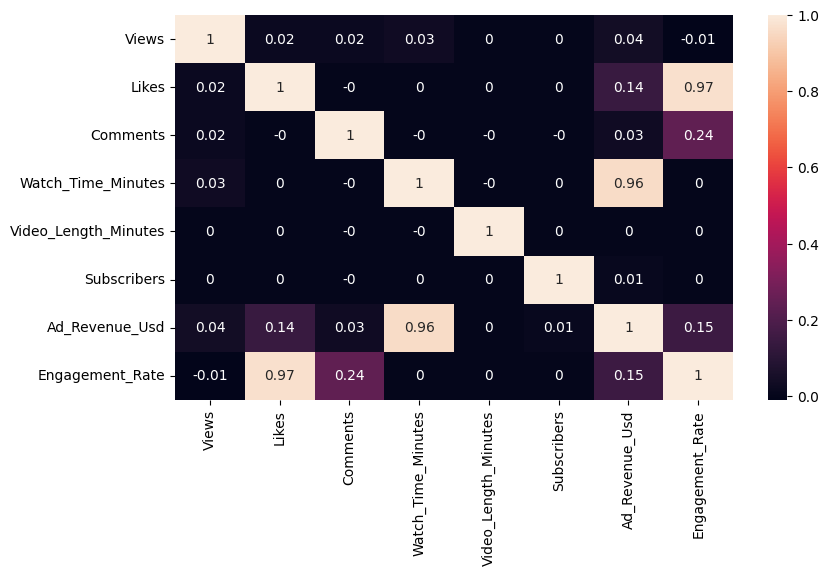

In [265]:
# heatmap:
plt.figure(figsize = (9, 5))
df1 = df[['Views', 'Likes', 'Comments', 'Watch_Time_Minutes', 'Video_Length_Minutes', 'Subscribers', 'Ad_Revenue_Usd','Engagement_Rate']]
sns.heatmap(df1.corr().round(2), annot = True) 



In [266]:
'''
Strong Negative Correlation -> [-1, -0.7]
Moderate Negative Correlation -> [-0.7, -0.4]
Weak Negative Correlation -> [-0.4, -0.1]

Uncorrelated -> [-0.1, 0.1]

Weak Positive Correlation -> [0.1, 0.4]
Moderate Positive Correlation -> [0.4, 0.7]
Strong Positive Correlation -> [0.7, 1]
'''

'\nStrong Negative Correlation -> [-1, -0.7]\nModerate Negative Correlation -> [-0.7, -0.4]\nWeak Negative Correlation -> [-0.4, -0.1]\n\nUncorrelated -> [-0.1, 0.1]\n\nWeak Positive Correlation -> [0.1, 0.4]\nModerate Positive Correlation -> [0.4, 0.7]\nStrong Positive Correlation -> [0.7, 1]\n'

In [267]:
# strong positive correlation:
'''
->Ad_Revenue_usd and watch_time_minitus are strong positive correlation 
->likes and Ad_Revenue_Usd,Comments and engagementrate, both of them have weak positive correlation.
->remaining all the variables are uncorrelated

'''

'\n->Ad_Revenue_usd and watch_time_minitus are strong positive correlation \n->likes and Ad_Revenue_Usd,Comments and engagementrate, both of them have weak positive correlation.\n->remaining all the variables are uncorrelated\n\n'

In [268]:
# DATA VISUALIZATION:

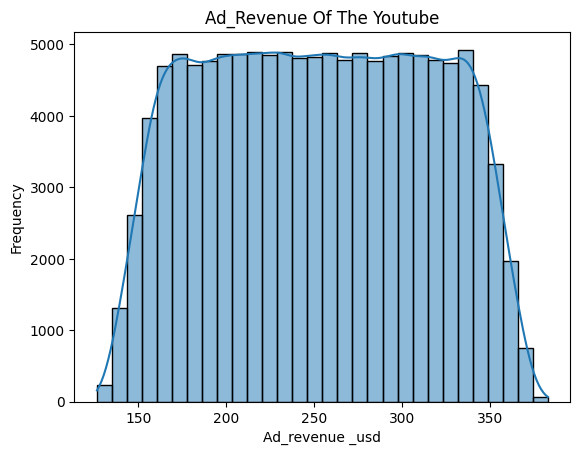

In [269]:
# outliers : 

plt.Figure(figsize = (5, 3))
sns.histplot(df['Ad_Revenue_Usd'], bins = 30, kde = True) 
plt.xlabel('Ad_revenue _usd')
plt.ylabel('Frequency')
plt.title("Ad_Revenue Of The Youtube")
plt.show()

In [270]:
'''
As we can see above plot says there is no outliers in the target column 

'''

'\nAs we can see above plot says there is no outliers in the target column \n\n'

In [271]:
# saving Cleaned dataframe :
df.to_csv("C:/guvi/project3/youtube.csv", index = False)

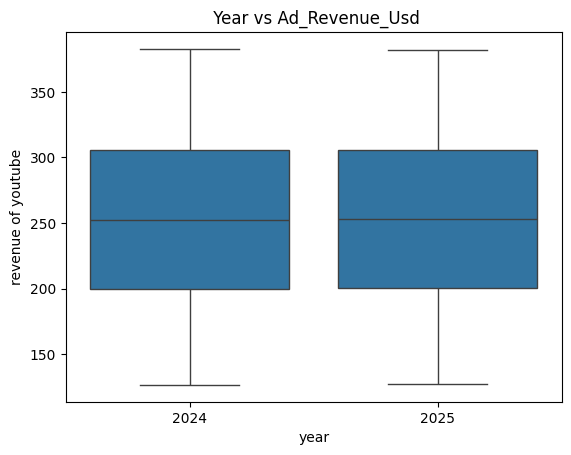

In [272]:
# year and Ad_revenue_usd:
plt.Figure(figsize = (5,3)) 
sns.boxplot(data = df, x = 'Year', y = 'Ad_Revenue_Usd')
plt.xlabel('year')
plt.ylabel('revenue of youtube')
plt.title(" Year vs Ad_Revenue_Usd")
plt.show()

In [273]:
# here above boxplot shows there are no outliers , both the years got same volume of revenue 

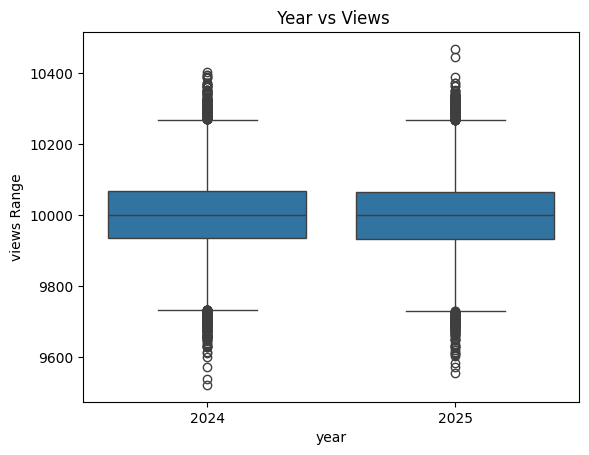

In [274]:
# years vs views:

plt.Figure(figsize = (5,3)) 
sns.boxplot(data = df, x = 'Year', y = 'Views')
plt.xlabel('year')
plt.ylabel('views Range')
plt.title(" Year vs Views")
plt.show()

In [275]:
# conclusion:

'''
The above box plot says there are lot of outliers in the views columns 
'''

'\nThe above box plot says there are lot of outliers in the views columns \n'

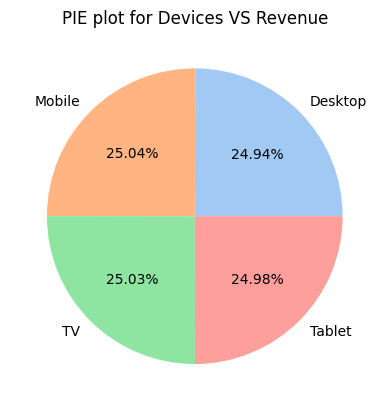

In [276]:
# pie plot: 
plt.Figure(figsize = (5, 3))
values = df.groupby('Device')['Ad_Revenue_Usd'].sum() 
df2 = values.reset_index() 

colors = sns.color_palette('pastel')
plt.pie(df2['Ad_Revenue_Usd'], labels=df2['Device'], colors = colors, autopct='%.2f%%')
plt.title('PIE plot for Devices VS Revenue')
plt.show()

In [277]:
'''# bar_plot:
plt.Figure(figsize = (5, 3))
sns.barplot( x = 'Category', y = 'Ad_Revenue_Usd', data = df)
plt.title("Bar Plot Revenue for Category")
plt.show() '''

# pie plot: 
plt.Figure(figsize = (5, 3))
values = df.groupby('Category')['Ad_Revenue_Usd'].sum() 
df2 = values.reset_index() 



In [278]:
df.head(10)

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month,Engagement_Rate
0,3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.21,2.86,228086,Entertainment,TV,India,203.18,2024,9,0.16
1,3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.75,23.74,736015,Gaming,Tablet,Canada,140.88,2024,9,0.10
2,4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.66,26.20,240534,Education,TV,Canada,360.13,2024,11,0.21
3,4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.52,11.77,434482,Entertainment,Mobile,United Kingtom,224.64,2025,1,0.14
4,3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.67,6.64,42030,Education,Mobile,Canada,165.51,2025,4,0.24
5,5000,2025-03-31 10:50:40.993199,10002,843.0,159.0,35131.76,12.49,541268,Music,TV,Canada,234.97,2025,3,0.10
6,2041,2024-12-10 10:50:40.993199,9989,1944.0,160.0,35380.07,6.52,193736,Music,Mobile,India,255.01,2024,12,0.21
7,3623,2025-04-05 10:50:40.993199,10051,784.0,458.0,19263.21,24.59,823662,Entertainment,Tablet,United States,164.53,2025,4,0.12
8,750,2025-02-17 10:50:40.993199,9934,292.0,88.0,37531.99,5.95,58437,Entertainment,Desktop,United Kingtom,336.41,2025,2,0.04
9,4434,2025-04-16 10:50:40.993199,10051,1103.0,61.0,40011.58,24.45,103872,Tech,Tablet,Germany,246.71,2025,4,0.12


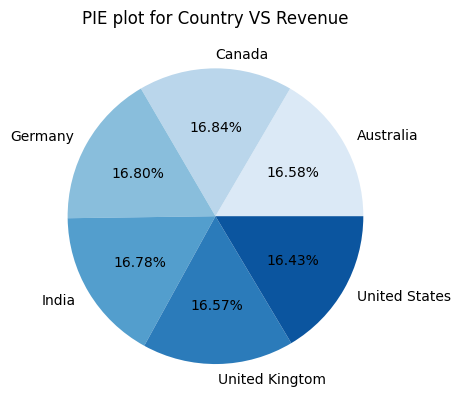

In [279]:
# pie plot: 
plt.Figure(figsize = (5, 3))
values = df.groupby('Country')['Ad_Revenue_Usd'].sum() 
df2 = values.reset_index() 

colors = sns.color_palette('Blues')
plt.pie(df2['Ad_Revenue_Usd'], labels=df2['Country'], colors = colors, autopct='%.2f%%')
plt.title('PIE plot for Country VS Revenue')
plt.show()

<Axes: xlabel='Month', ylabel='Ad_Revenue_Usd'>

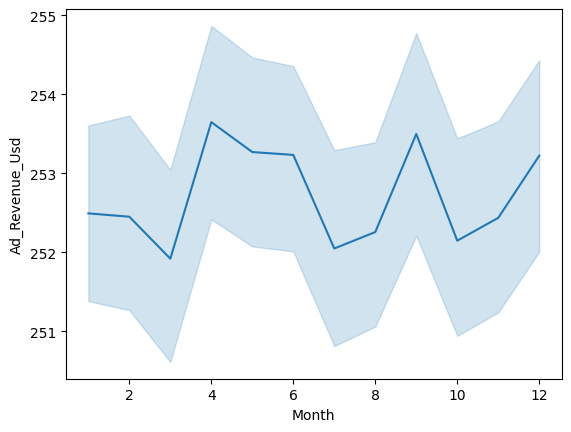

In [280]:
# trend Analysis: 
plt.Figure(figsize = (5, 3))
sns.lineplot(data = df, x = 'Month', y = 'Ad_Revenue_Usd')


<Axes: xlabel='Subscribers', ylabel='Country'>

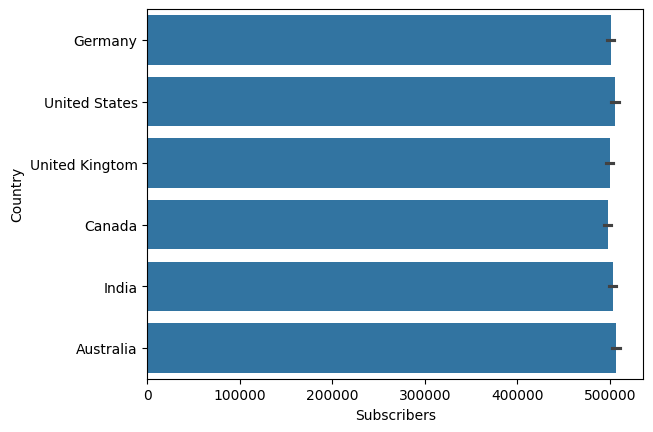

In [281]:
plt.Figure(figsize = (5, 3))
df_sorted = df.sort_values('Subscribers')
sns.barplot(data = df_sorted, y = 'Country', x = 'Subscribers', orient='h')


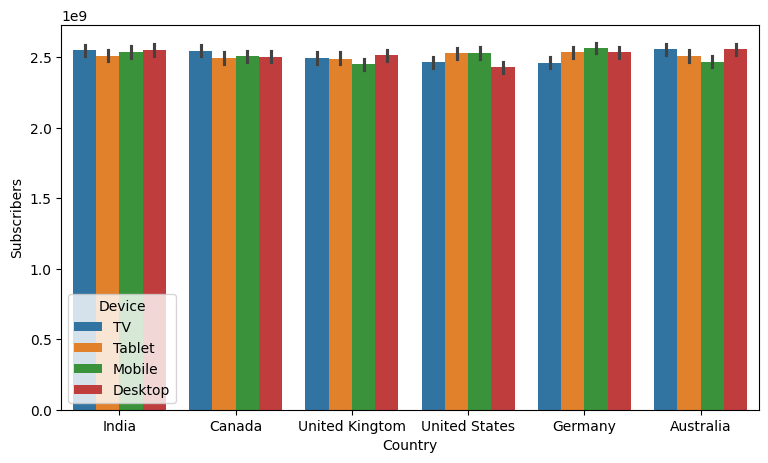

In [282]:
# Clustered Bar Chart
plt.figure(figsize = (9, 5))
sns.barplot(x = 'Country', y = 'Subscribers', hue = 'Device', estimator = 'sum', data = df)
plt.show()

In [283]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder 

columns_encode = ['Category','Device', 'Country']

# Initializing the label encoder
encoder = LabelEncoder()

# Assigning numerical value 
for column in columns_encode:
    df[column] = encoder.fit_transform(df[column])

In [284]:
df.head()

,Video_Id,Date,Views,Likes,Comments,Watch_Time_Minutes,Video_Length_Minutes,Subscribers,Category,Device,Country,Ad_Revenue_Usd,Year,Month,Engagement_Rate
0,3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.21,2.86,228086,1,2,3,203.18,2024,9,0.16
1,3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.75,23.74,736015,2,3,1,140.88,2024,9,0.10
2,4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.66,26.20,240534,0,2,1,360.13,2024,11,0.21
3,4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.52,11.77,434482,1,1,4,224.64,2025,1,0.14
4,3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.67,6.64,42030,0,1,1,165.51,2025,4,0.24


In [285]:
# getting an idean about the data_size: above 30 we consider high dimensionality data, so here we neet not to apply PCA
df.shape

(120000, 15)

In [286]:
# split the data target and input features:
X = df.drop(['Ad_Revenue_Usd', 'Date', 'Video_Id'], axis = 1)
y = df['Ad_Revenue_Usd']

In [287]:
# split the data: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5) 

In [288]:
'''
test_size = 0.2 --> we took only 20% of data for testing, remaining 80% of data for training the model 
random_state  = 5, we split the data train and test randomly, and same data points for training and testing,
Using 5 ensures that the results are identical every time.
'''

'\ntest_size = 0.2 --> we took only 20% of data for testing, remaining 80% of data for training the model \nrandom_state  = 5, we split the data train and test randomly, and same data points for training and testing,\nUsing 5 ensures that the results are identical every time.\n'

In [289]:
# Scale the data:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


Model name : LinearRegression

Training Scores:
Training RMSE : 13.819
Training MAE : 3.193
Training R2 Score : 0.95

Testing Scores: 
Testing RMSE : 13.798
Testing MAE : 3.238
Testing R2 Score : 0.951
----------------------------------------------------


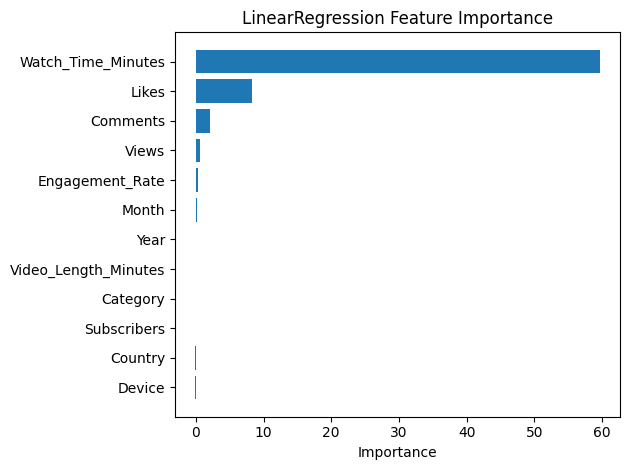


Model name : Ridge

Training Scores:
Training RMSE : 13.819
Training MAE : 3.193
Training R2 Score : 0.95

Testing Scores: 
Testing RMSE : 13.798
Testing MAE : 3.238
Testing R2 Score : 0.951
----------------------------------------------------


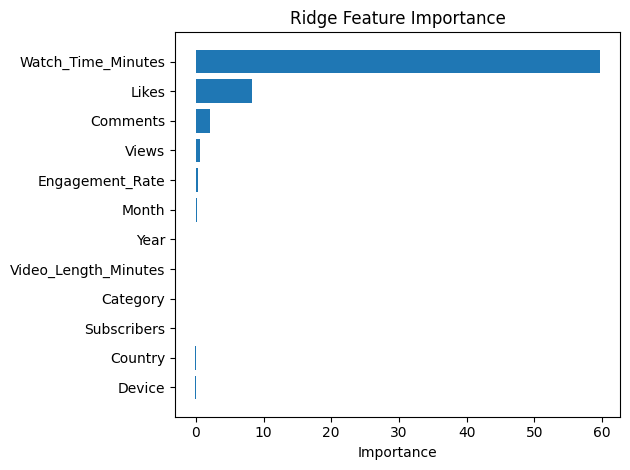


Model name : Lasso

Training Scores:
Training RMSE : 13.924
Training MAE : 4.31
Training R2 Score : 0.949

Testing Scores: 
Testing RMSE : 13.912
Testing MAE : 4.355
Testing R2 Score : 0.95
----------------------------------------------------


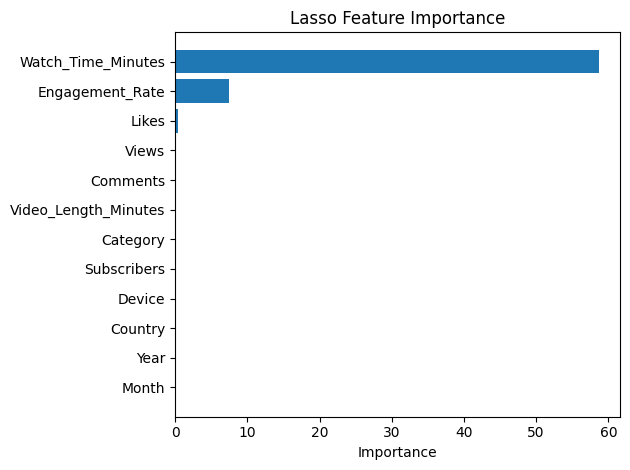


Model name : RandomForestRegressor

Training Scores:
Training RMSE : 5.292
Training MAE : 1.45
Training R2 Score : 0.993

Testing Scores: 
Testing RMSE : 14.23
Testing MAE : 3.899
Testing R2 Score : 0.948
----------------------------------------------------


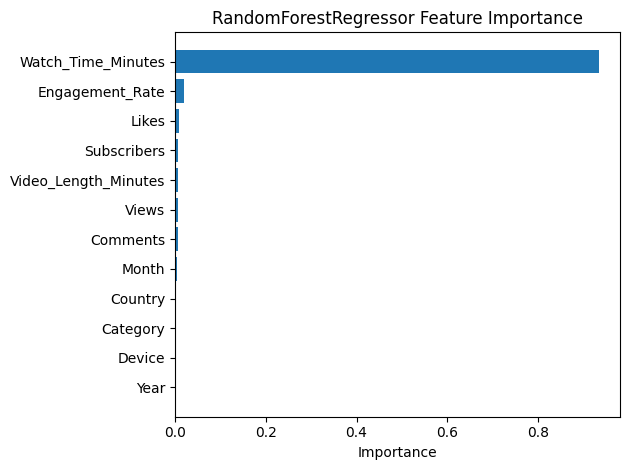


Model name : GradientBoostingRegressor

Training Scores:
Training RMSE : 13.802
Training MAE : 3.751
Training R2 Score : 0.95

Testing Scores: 
Testing RMSE : 13.836
Testing MAE : 3.816
Testing R2 Score : 0.95
----------------------------------------------------


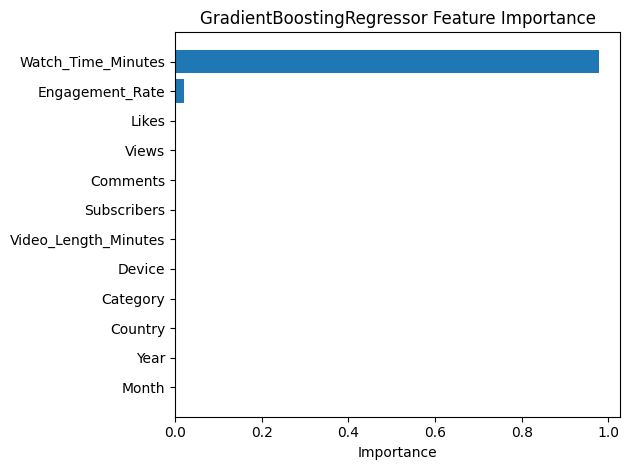


Model name : DecisionTreeRegressor

Training Scores:
Training RMSE : 0.0
Training MAE : 0.0
Training R2 Score : 1.0

Testing Scores: 
Testing RMSE : 20.543
Testing MAE : 5.716
Testing R2 Score : 0.891
----------------------------------------------------


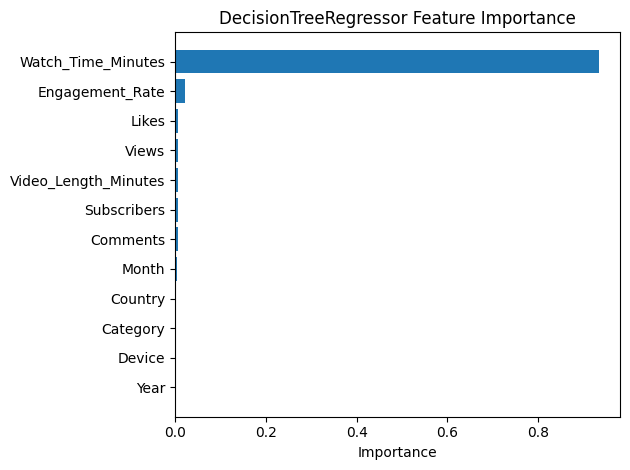

In [290]:
# Initilaize the model:
models = [LinearRegression(),Ridge(), Lasso(),RandomForestRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor()] 

for model in models:

    # Fitting the model: 
    model.fit(X_train_scaled, y_train)

    # Taking the predictions from the model:

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Model Evaluation on training data 
    print(f"\nModel name : {type(model).__name__}\n")
    print("Training Scores:")
    print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
    print('Training MAE :', np.round((metrics.mean_absolute_error(y_train, y_train_pred)),3))
    print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

    print("\nTesting Scores: ")
    print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 3))
    print('Testing MAE :', np.round((metrics.mean_absolute_error(y_test, y_test_pred)),3))
    print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_test_pred), 3))
    print("----------------------------------------------------") 


    if type(model).__name__ == 'LinearRegression' or type(model).__name__ == 'Lasso' or type(model).__name__ == 'Ridge':
        importance_dataframe = pd.DataFrame({'Importance' : model.coef_, 'Features' : X.columns}).sort_values(by = 'Importance', ascending = False)
        plt.Figure(figsize = (9, 5))
        plt.barh(importance_dataframe['Features'], importance_dataframe['Importance'],) 
        plt.xlabel('Importance')
        plt.title(f'{type(model).__name__} Feature Importance')
        plt.gca().invert_yaxis() # Research about this
        plt.tight_layout()
        plt.show() 
    else: 
        # Feature importance:
        importance_dataframe = pd.DataFrame({'Importance' : model.feature_importances_, 'Features' : X.columns}).sort_values(by = 'Importance', ascending = False)
        plt.Figure(figsize = (9, 5))
        plt.barh(importance_dataframe['Features'], importance_dataframe['Importance'],) 
        plt.xlabel('Importance')
        plt.title(f'{type(model).__name__} Feature Importance')
        plt.gca().invert_yaxis() # Research about this
        plt.tight_layout()
        plt.show() 



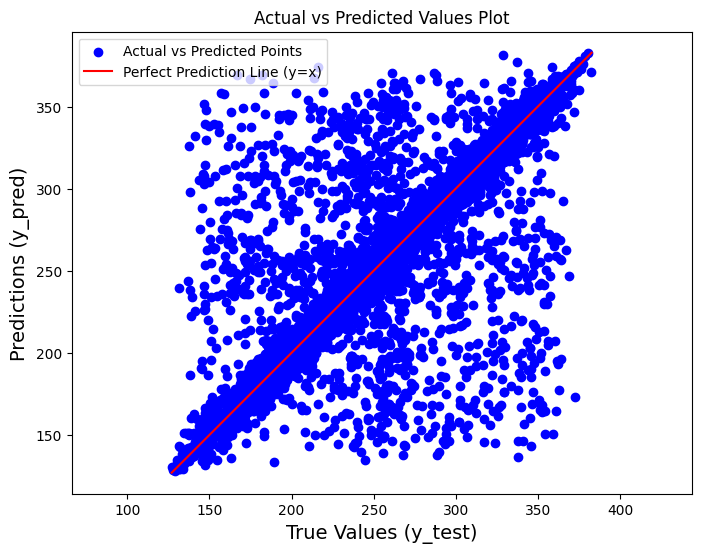

In [292]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, c='blue', label='Actual vs Predicted Points')

# Plot the perfect prediction line (y=x)
p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-', label='Perfect Prediction Line (y=x)')

plt.xlabel('True Values (y_test)', fontsize=14)
plt.ylabel('Predictions (y_pred)', fontsize=14)
plt.title('Actual vs Predicted Values Plot')
plt.legend()
plt.axis('equal')
plt.show()

In [293]:
model_performence = {
    "Models" : ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor'],
    "RMSE" : [13.8, 13.8, 13.912, 14.208, 20.439, 13.838],
    "MAE" : [3.264, 3.264, 4.355, 3.888, 5.63, 3.819],
    "R2_Score" : [0.951, 0.951, 0.95, 0.948, 0.892, 0.95]
} 

df_model_performence = pd.DataFrame(model_performence)
df_model_performence

,Models,RMSE,MAE,R2_Score
0,LinearRegression,13.800,3.264,0.951
1,Ridge,13.800,3.264,0.951
2,Lasso,13.912,4.355,0.950
3,RandomForestRegressor,14.208,3.888,0.948
4,DecisionTreeRegressor,20.439,5.630,0.892
5,GradientBoostingRegressor,13.838,3.819,0.950


In [ ]:
# saving our cleaned dataframe in out local ssystem:

df.to_csv('youtube_data.csv', index=False)



In [ ]:
# Taking the Best model:

best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Taking the predictions from the model:

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Model Evaluation on training data 
print(f"\nModel name : {type(best_model).__name__}\n")
print("Training Scores:")
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3))
print('Training MAE :', np.round((metrics.mean_absolute_error(y_train, y_train_pred)),3))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 3))

print("\nTesting Scores: ")
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 3))
print('Testing MAE :', np.round((metrics.mean_absolute_error(y_test, y_test_pred)),3))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_test_pred), 3)) 




Model name : LinearRegression

Training Scores:
Training RMSE : 13.819
Training MAE : 3.193
Training R2 Score : 0.95

Testing Scores: 
Testing RMSE : 13.798
Testing MAE : 3.238
Testing R2 Score : 0.951


In [297]:
import joblib
filename = 'C:/guvi/project3/finalized_model.joblib'

# 3. Save the model to disk
joblib.dump(best_model, filename)

print(f"Model successfully saved to {filename}")

Model successfully saved to C:/guvi/project3/finalized_model.joblib


In [298]:
loaded_model = joblib.load('finalized_model.joblib') 
print(loaded_model)

LinearRegression()


In [299]:
X_test.shape

(24000, 12)

In [301]:
plt.Figure(figsize = (5, 3))
df1 = df.groupby(['Video_Id','Watch_Time_Minutes','Category'])['Ad_Revenue_Usd'].sum()

df1 = df1.reset_index()
df1 = df1.sort_values(by = 'Ad_Revenue_Usd', ascending = False)
df1.head()

,Video_Id,Watch_Time_Minutes,Category,Ad_Revenue_Usd
19095,795,37531.99,3,978.11
20259,845,37531.99,3,965.04
109530,4586,37531.99,1,951.97
82621,3461,37531.99,0,941.41
60446,2540,37531.99,2,907.54


In [ ]:
# Find out which video id got highest Engagement_Rate:
df_grp = df.groupby('Video_Id')[['Views','Subscribers', 'Likes', 'Ad_Revenue_Usd', 'Engagement_Rate']].sum() 
df_grp = df_grp.reset_index()
df_grp = df_grp.sort_values(by = 'Engagement_Rate', ascending = False)
df_grp.head()

,Video_Id,Views,Subscribers,Likes,Ad_Revenue_Usd,Engagement_Rate
3032,3033,460667,24234245,50696.0,11738.93,6.32
2708,2709,390055,19857986,51139.0,10058.88,6.32
2925,2926,370614,17206934,48881.0,10147.01,5.99
3657,3658,379365,19756160,48430.0,9773.97,5.92
1724,1725,420571,24001842,46628.0,9879.02,5.83


In [ ]:
# Find out which video id got lowest Engagement_Rate:
df_grp = df.groupby('Video_Id')[['Views','Subscribers', 'Likes', 'Ad_Revenue_Usd', 'Engagement_Rate']].sum() 
df_grp = df_grp.reset_index()
df_grp = df_grp.sort_values(by = 'Engagement_Rate', ascending = False)
df_grp.tail()

,Video_Id,Views,Subscribers,Likes,Ad_Revenue_Usd,Engagement_Rate
3208,3209,139757,8610238,9897.0,3386.24,1.37
980,981,110099,5498756,9839.0,2703.18,1.32
1628,1629,100025,7247886,10278.0,2228.34,1.29
4851,4852,110023,4412491,9352.0,2877.57,1.23
3846,3847,109944,7161667,9495.0,2539.78,1.15


In [ ]:
# Find out which video id got highest views:
df_grp1 = df.groupby(['Video_Id'])[['Views','Engagement_Rate', 'Ad_Revenue_Usd', 'Subscribers']].sum() 
df_grp1 = df_grp.reset_index()
df_grp1 = df_grp.sort_values(by = 'Ad_Revenue_Usd', ascending = False)
df_grp1.tail()

,Video_Id,Views,Subscribers,Likes,Ad_Revenue_Usd,Engagement_Rate
980,981,110099,5498756,9839.0,2703.18,1.32
2487,2488,119675,6836756,14055.0,2660.65,1.72
2213,2214,110005,4487298,12821.0,2592.63,1.61
3846,3847,109944,7161667,9495.0,2539.78,1.15
1628,1629,100025,7247886,10278.0,2228.34,1.29


In [ ]:
# Find out which video id got highest Engagement_Rate:
df_eng = df.groupby('Video_Id')[['Engagement_Rate', 'Ad_Revenue_Usd']].sum() 
df_eng = df_eng.reset_index()
df_eng = df_eng.sort_values(by = 'Engagement_Rate', ascending = False)
df_eng.head()

,Video_Id,Engagement_Rate,Ad_Revenue_Usd
3032,3033,6.32,11738.93
2708,2709,6.32,10058.88
2925,2926,5.99,10147.01
3657,3658,5.92,9773.97
1724,1725,5.83,9879.02


In [ ]:
# Find out which video id gor highest Subscribers:
df_sub = df.groupby('Video_Id')[['Subscribers', 'Ad_Revenue_Usd']].sum() 
df_sub = df_sub.reset_index()
df_sub = df_sub.sort_values(by = 'Subscribers', ascending = False)
df_sub.head()

,Video_Id,Subscribers,Ad_Revenue_Usd
3032,3033,24234245,11738.93
1724,1725,24001842,9879.02
1405,1406,22484152,9340.89
2015,2016,22387946,8387.49
3331,3332,22132986,9918.71


In [ ]:
# Find out which video id gor lowest  Subcribers:
df_sub = df.groupby('Video_Id')[['Subscribers', 'Ad_Revenue_Usd']].sum() 
df_sub = df_sub.reset_index()
df_sub = df_sub.sort_values(by = 'Subscribers', ascending = False)
df_sub.tail()

,Video_Id,Subscribers,Ad_Revenue_Usd
4510,4511,5030560,3092.64
1496,1497,4990689,3903.28
1483,1484,4762038,4562.42
2213,2214,4487298,2592.63
4851,4852,4412491,2877.57
